In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv("dataset3.csv")
df.head(10)

,employee_id|department|region|education|gender|recruitment_channel|no_of_trainings|age|previous_year_rating|length_of_service|awards_won?|avg_training_score|is_promoted
0,65438|Sales & Marketing|region_7|Master's & ab...
1,65141|Operations|region_22|Bachelor's|m|other|...
2,7513|Sales & Marketing|region_19|Bachelor's|m|...
3,2542|Sales & Marketing|region_23|Bachelor's|m|...
4,48945|Technology|region_26|Bachelor's|m|other|...
5,58896|Analytics|region_2|Bachelor's|m|sourcing...
6,20379|Operations|region_20|Bachelor's|f|other|...
7,16290|Operations|region_34|Master's & above|m|...
8,73202|Analytics|region_20|Bachelor's|m|other|1...
9,28911|Sales & Marketing|region_1|Master's & ab...


In [3]:
df=pd.read_csv("dataset3.csv",sep='|')
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31,3.0,7,0,85.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1.0,31,3.0,5,0,59.0,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1.0,33,3.0,6,0,63.0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1.0,28,4.0,5,0,83.0,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1.0,32,5.0,5,0,54.0,0


#Ex A:

In [4]:
df.set_index(" employee_id", inplace=True)

Transformei o id no índice do dataset para ele não interferir na predição.

<Axes: >

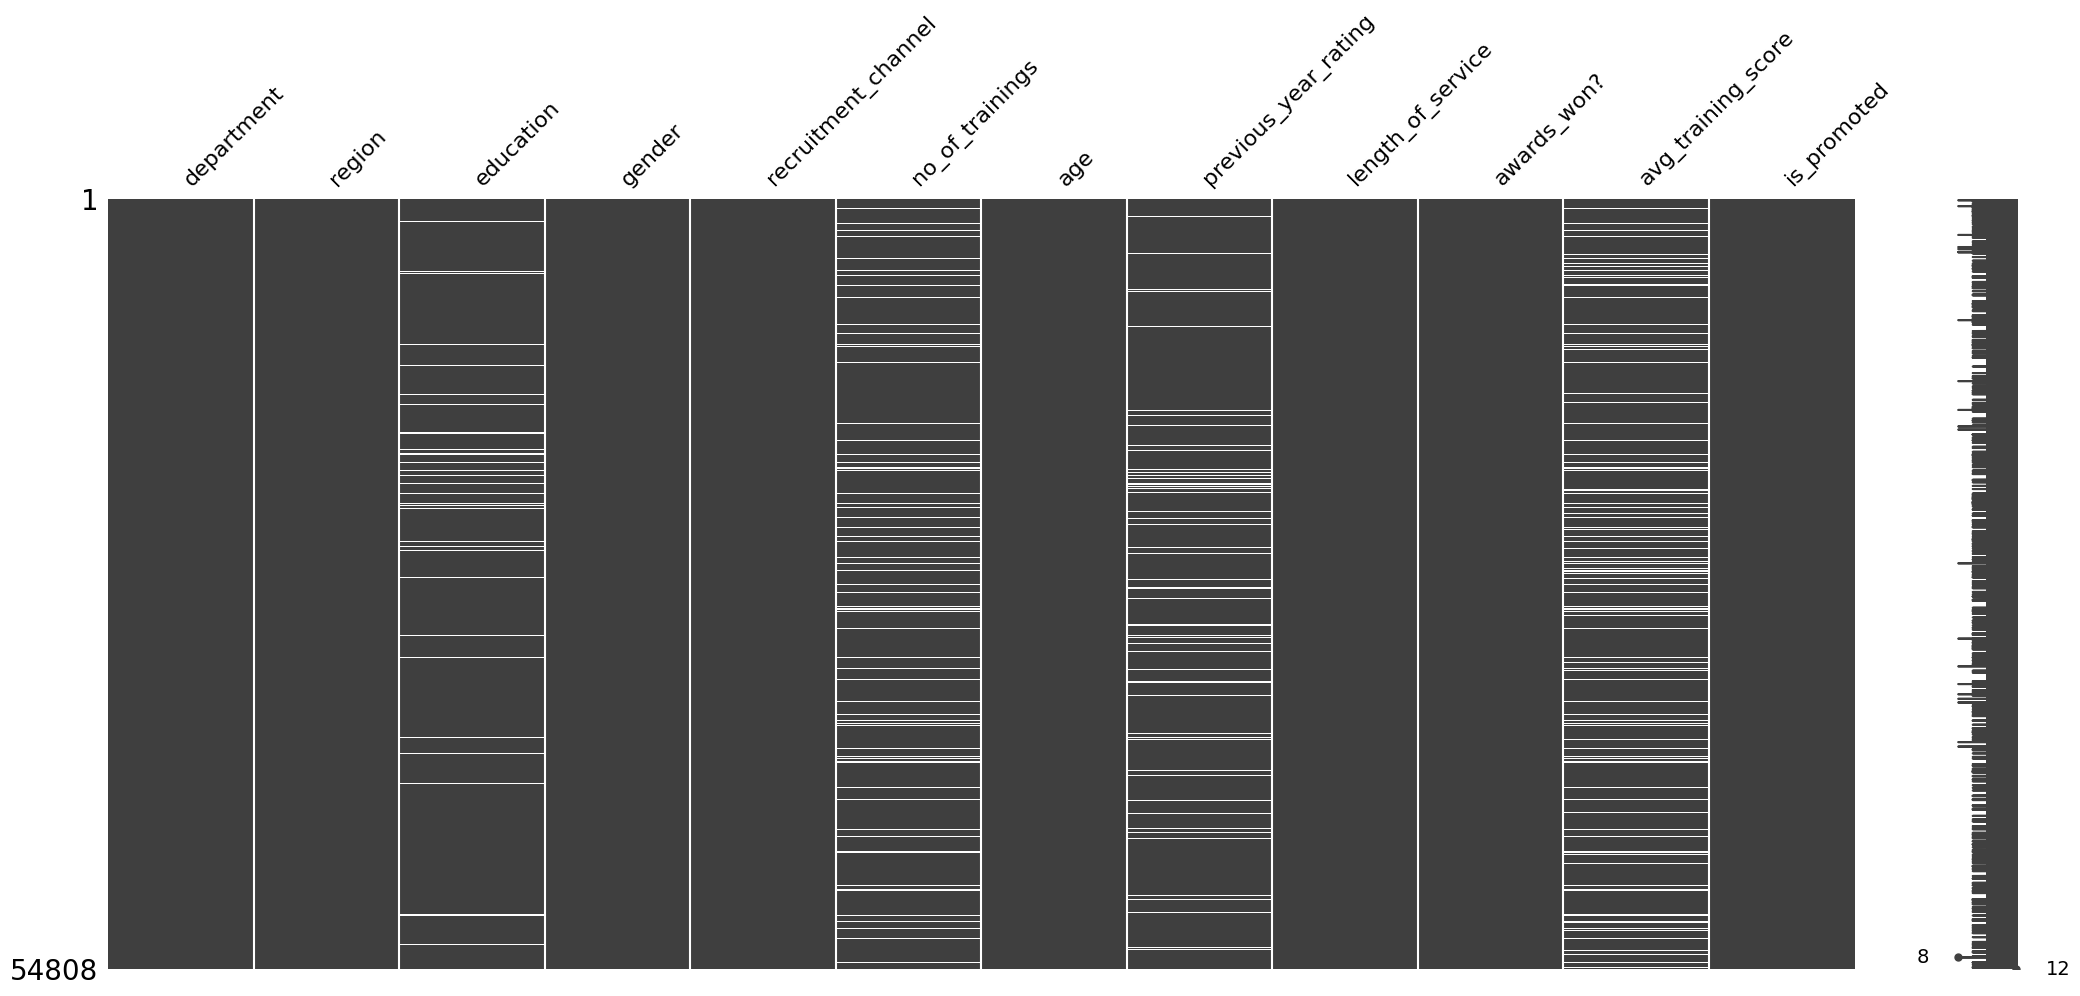

In [5]:
msno.matrix(df)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,49962.0,1.256475,0.612734,1.0,1.0,1.0,1.0,10.0
age,54808.0,273.521530,5422.563711,-32.0,29.0,33.0,39.0,123456.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,47350.0,63.514213,13.492071,39.0,51.0,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


Pelo describe e pelo missingno as colunas: 'previous_year_rating'; 'length_of_service'; 'awards_won?'; 'avg_training_score'; 'is_promoted' aparentam já normais, não precisando de limpeza.

In [7]:
len(df[df["age"]<0])

3

In [8]:
condicao = df["age"] < 0
linhas_selecionadas = df[condicao]
linhas_selecionadas

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
39787,Operations,region_14,Below Secondary,m,other,1.0,-32,NaN,1,0,NaN,1
49858,Operations,region_30,Below Secondary,m,other,1.0,-32,NaN,1,0,59.0,1
34117,Operations,region_30,Below Secondary,m,sourcing,1.0,-32,NaN,1,0,57.0,0


-32 pode ser um erro e representar 32 anos de idade, logo substituirei -32 por 32

In [9]:
df['age'].replace(-32, 32, inplace=True)

In [10]:
len(df[df["age"]>80])

106

In [11]:
condicao2 = df["age"] > 80
linhas_selecionadas2 = df[condicao2]
linhas_selecionadas2.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
67467,Finance,region_2,Below Secondary,f,other,NaN,123456,3.0,2,0,NaN,0
53988,Finance,region_2,Below Secondary,m,other,1.0,123456,5.0,2,0,60.0,0
16004,Finance,region_22,Below Secondary,m,other,1.0,123456,3.0,3,0,61.0,0
36231,Finance,region_2,Below Secondary,m,sourcing,2.0,123456,NaN,1,0,60.0,0
35070,Finance,region_22,Below Secondary,m,sourcing,1.0,123456,NaN,1,0,61.0,0
24075,Finance,region_2,Below Secondary,f,other,NaN,123456,3.0,2,0,NaN,0
41956,Finance,region_2,Below Secondary,m,other,2.0,123456,NaN,1,0,60.0,0
55491,Finance,region_2,Below Secondary,m,other,2.0,123456,5.0,1,0,61.0,0
47793,Finance,region_2,Below Secondary,m,sourcing,3.0,123456,3.0,2,0,60.0,0


In [12]:
linhas_selecionadas2['department'].unique()

array(['Finance'], dtype=object)

In [13]:
linhas_selecionadas2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,82.0,1.426829,0.685484,1.0,1.0,1.0,2.00,3.0
age,106.0,123456.000000,0.000000,123456.0,123456.0,123456.0,123456.00,123456.0
previous_year_rating,66.0,3.515152,1.098844,1.0,3.0,3.0,4.00,5.0
length_of_service,106.0,1.745283,0.769184,1.0,1.0,2.0,2.00,5.0
awards_won?,106.0,0.037736,0.191462,0.0,0.0,0.0,0.00,1.0
avg_training_score,82.0,60.036585,3.511692,51.0,58.0,60.0,61.75,73.0
is_promoted,106.0,0.056604,0.232182,0.0,0.0,0.0,0.00,1.0


In [14]:
len(linhas_selecionadas2[linhas_selecionadas2['is_promoted']==1])

6

In [15]:
linhas_selecionadas2['education'].unique()

array(['Below Secondary'], dtype=object)

In [16]:
len(df[df["department"]=='Finance'])

2536

Provamente esse 106 funcionários, todos do setor de finanças, passaram pelo mesmo erro na atribução da idade. Por idade aparentemente não significar muito para a promoção, substituirei as idades 123456 pela mediana

In [17]:
df['age'].median()

33.0

In [18]:
df['age'].replace(123456, df['age'].median(), inplace=True)

In [19]:
df['no_of_trainings'].isna().sum()

4846

In [20]:
df['ambas_colunas_nulas'] = (df['no_of_trainings'].isnull() & df['avg_training_score'].isnull())
linhas_nulas = df[df['ambas_colunas_nulas'] == True]
len(linhas_nulas)

4846

In [21]:
df.drop('ambas_colunas_nulas', axis=1, inplace=True)

Todas as linhas com o n° de treinos nulos a pontuação média dos treinos também é nula, então é possível afirmar que os  nulos no número de treinos é porque a pessoa não realizou nenhum, e não houve erro na execução do dataset.

In [22]:
df['no_of_trainings'].replace(np.nan, 0, inplace=True)

In [23]:
df['no_of_trainings'].isna().sum()

0

In [24]:
df['avg_training_score'].isna().sum()

7458

In [25]:
df.loc[df['no_of_trainings'] == 0, 'avg_training_score'] = 0

Para todos com 0 treinos colocarei a pontuação média deles em 0

In [26]:
df['avg_training_score'].isna().sum()

2612

In [27]:
df_Tnulo=df[df['avg_training_score'].isna()]

In [28]:
df_Tnulo.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
12067,Procurement,region_14,Bachelor's,m,other,1.0,35,3.0,7,0,NaN,0
64062,Technology,region_28,Bachelor's,m,sourcing,1.0,33,4.0,4,0,NaN,0
58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1.0,33,5.0,6,0,NaN,1
21628,Analytics,region_12,Bachelor's,m,other,1.0,34,3.0,8,0,NaN,0
43923,Analytics,region_14,Bachelor's,m,sourcing,1.0,31,4.0,4,0,NaN,0


In [29]:
df_Tnulo.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,2612.0,1.204441,0.555888,1.0,1.0,1.0,1.0,8.0
age,2612.0,33.651991,5.497071,22.0,30.0,33.0,37.0,60.0
previous_year_rating,2448.0,3.409314,1.268567,1.0,3.0,3.0,5.0,5.0
length_of_service,2612.0,5.521440,3.380946,1.0,3.0,5.0,7.0,24.0
awards_won?,2612.0,0.028331,0.165948,0.0,0.0,0.0,0.0,1.0
avg_training_score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_promoted,2612.0,0.102986,0.303999,0.0,0.0,0.0,0.0,1.0


Esses outros com a média de pontuação nos treinos tem dados aparentemente normais, e devem ter passado por algum problema no preenchimento desse dado, logo atribuirei a média

In [30]:
df['avg_training_score'].replace(np.nan, df['avg_training_score'].mean(), inplace=True)

In [31]:
df['avg_training_score'].isna().sum()

0

In [32]:
df['previous_year_rating'].isna().sum()

4124

In [33]:
df_Tnulo2=df[df['previous_year_rating'].isna()]

In [34]:
df_Tnulo2['length_of_service'].describe()

count    4124.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: length_of_service, dtype: float64

Todos com "previous_year_rating" nulo tem apenas um ano de empresa, ou seja, não passaram pela avaliação do ano anterior, logo será atribuido 0 aos nulos.

In [35]:
df['previous_year_rating'].replace(np.nan, 0, inplace=True)

Agora vou partir para limpar os dados categóricos:

In [36]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,35010,30446


In [37]:
df["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal',
       'quem trouxe quenga'], dtype=object)

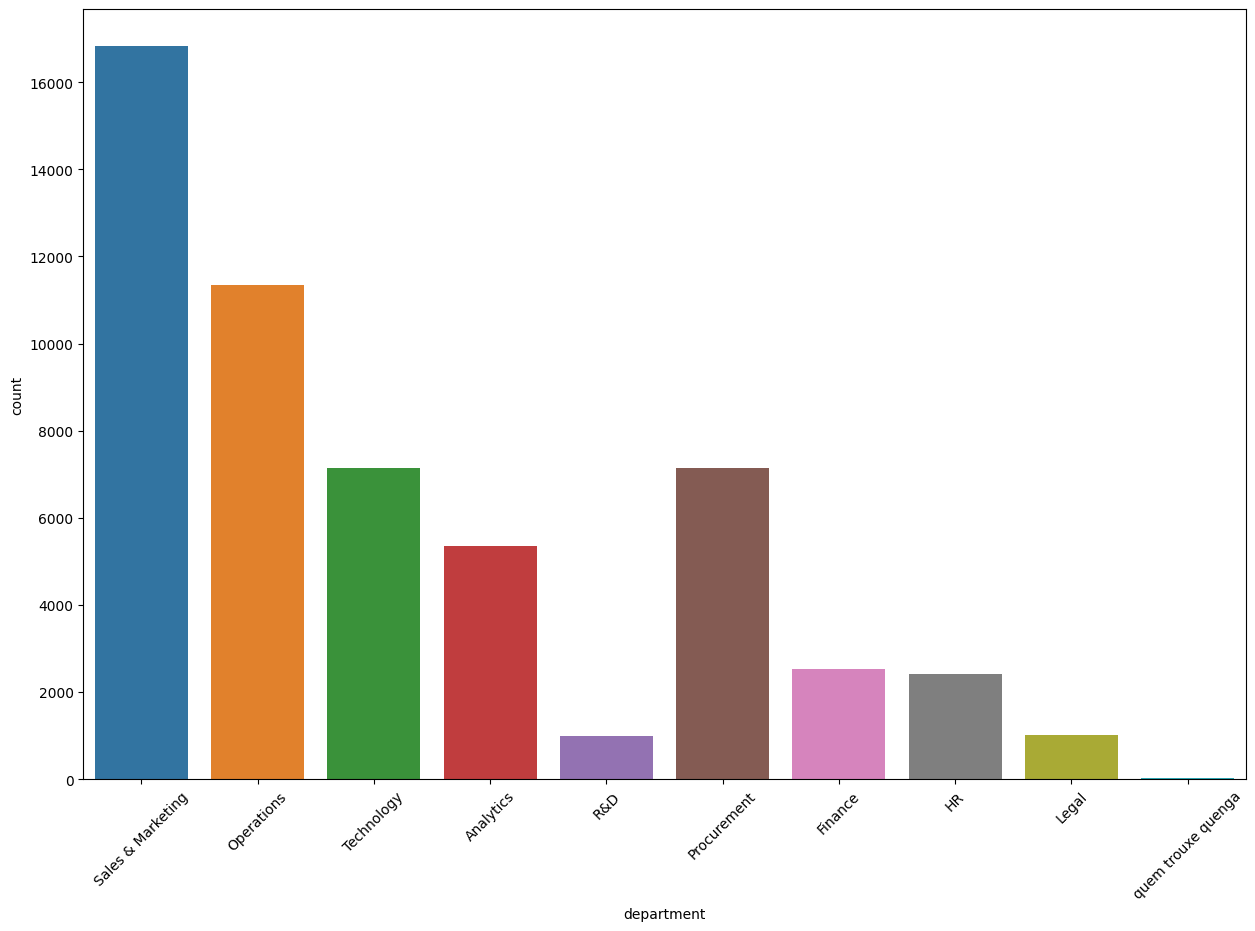

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x='department', data=df)
plt.xticks(rotation=45)
plt.show()

In [39]:
len(df[df['department']=='quem trouxe quenga'])

25

In [40]:
df.loc[df['department']=='quem trouxe quenga']

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
18981,quem trouxe quenga,region_2,Master's & above,m,sourcing,1.0,50,5.0,6,1,58.000000,0
72435,quem trouxe quenga,region_2,Bachelor's,f,other,0.0,52,3.0,4,1,0.000000,0
13038,quem trouxe quenga,region_7,Master's & above,MALE,sourcing,1.0,54,3.0,7,1,54.000000,0
41705,quem trouxe quenga,region_2,Bachelor's,m,other,1.0,38,3.0,6,1,60.000000,0
39334,quem trouxe quenga,region_22,Bachelor's,m,other,1.0,27,4.0,4,1,57.000000,0
3195,quem trouxe quenga,region_8,Bachelor's,m,sourcing,1.0,31,3.0,5,1,54.000000,0
76567,quem trouxe quenga,region_7,Bachelor's,MALE,sourcing,1.0,27,0.0,1,1,97.000000,1
54229,quem trouxe quenga,region_7,Bachelor's,MALE,sourcing,1.0,29,2.0,2,1,63.000000,0
61686,quem trouxe quenga,region_31,Bachelor's,f,other,1.0,31,3.0,6,1,60.000000,0


O departamento 'quem trouxe quenga' me parece uma trollagem kkkkkkkk, mas pelo resto dos dados parecer normal, vou só trocar 'quem trouxe quenga' pela moda.

In [41]:
df['department'].replace('quem trouxe quenga', df['department'].mode()[0], inplace=True)

In [42]:
df["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [43]:
df['gender'].unique()

array(['f', 'm', 'MALE', 'fEMALE', 'eu sou homem hetero homossexual!'],
      dtype=object)

In [44]:
df["gender"].replace("MALE", "m", inplace=True)
df["gender"].replace('eu sou homem hetero homossexual!', "m", inplace=True)
df["gender"].replace("fEMALE", "f", inplace=True)
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [45]:
df["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [46]:
df['education'].isna().sum()/len(df['education'])

0.04395343745438622

<Axes: xlabel='education', ylabel='count'>

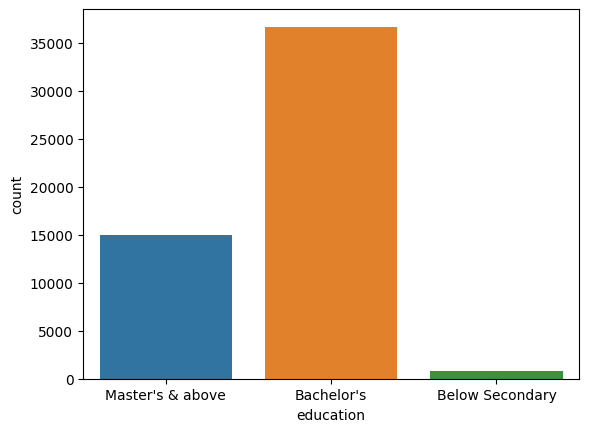

In [47]:
sns.countplot(x=df['education'])

Por os nulos representarem apenas 4% e por a formação no bacharelado ocorrer em grande maioria, substituirei os nulos pela moda.

In [48]:
df['education'].replace(np.nan, df['education'].mode()[0], inplace=True)

In [49]:
df['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [50]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

In [51]:
df.loc[df['region']=='casa da lu na suecia']

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
34808,HR,casa da lu na suecia,Bachelor's,m,sourcing,1.0,26,0.0,1,1,45.0,0
25476,HR,casa da lu na suecia,Bachelor's,m,other,1.0,31,4.0,3,0,53.0,0
39343,HR,casa da lu na suecia,Bachelor's,m,other,1.0,26,1.0,2,0,47.0,0
9351,HR,casa da lu na suecia,Bachelor's,m,other,1.0,26,0.0,1,0,53.0,0


Assim como fiz acima com os departamentos, farei com as regiões 'casa da lu na suecia'

In [52]:
df['region'].replace('casa da lu na suecia', df['region'].mode()[0], inplace=True)

In [53]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

<Axes: xlabel='recruitment_channel', ylabel='count'>

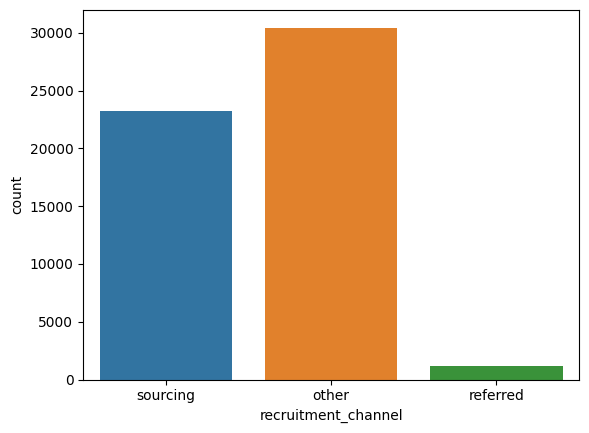

In [54]:
sns.countplot(x=df['recruitment_channel'])

Não parece haver muito o que fazer nesse caso.

#Ex B:

Agora com o dataset limpo, vamos analisá-lo.

<Axes: xlabel='is_promoted', ylabel='count'>

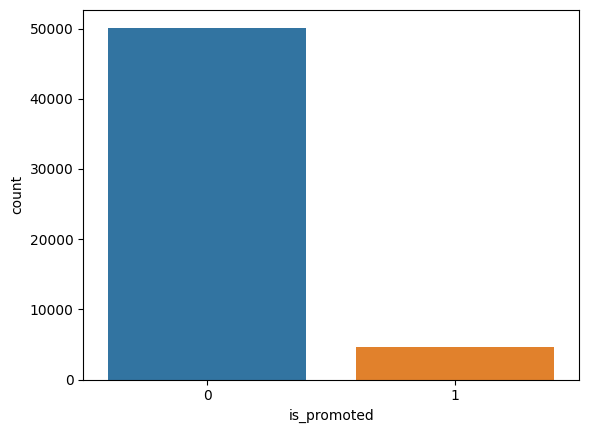

In [55]:
sns.countplot(x=df['is_promoted'])

In [56]:
len(df[df['is_promoted']==1])/len(df['is_promoted'])

0.08517004816815063

Apenas 8,5% tem o target como verdadeiro, ou seja, apenas 8,5% é recomendado a receber a promoção.

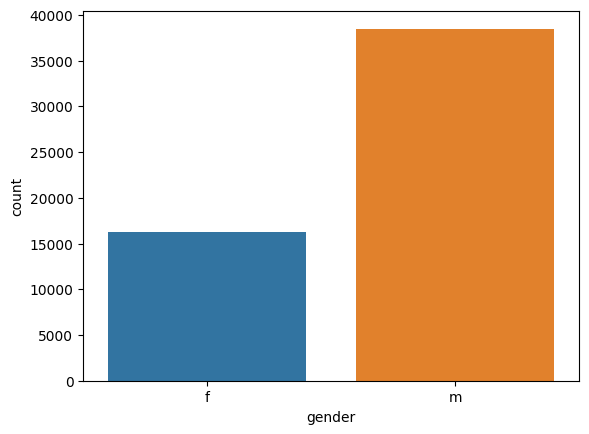

In [57]:
sns.countplot(x=df['gender'])
plt.show()

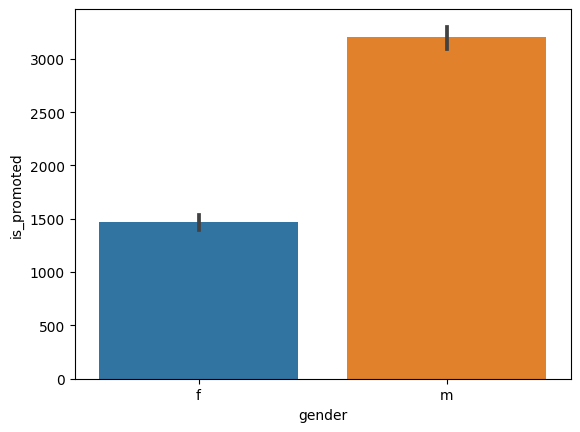

In [58]:
sns.barplot(x='gender', y= 'is_promoted', data= df, estimator=sum)
plt.show()

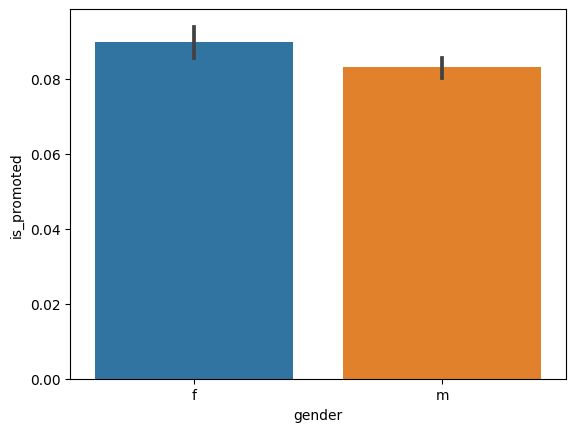

In [59]:
sns.barplot(x='gender', y= 'is_promoted', data= df)
plt.show()

In [60]:
len(df[(df['gender']=='m') & (df['is_promoted']==1)])/len(df[df['gender']=='m'])

0.08315149625935161

In [61]:
len(df[(df['gender']=='f') & (df['is_promoted']==1)])/len(df[df['gender']=='f'])

0.08993379107405591

A empresa apresenta um contigente masculino muito maior, sendo o número de homens com recomendação para ser promovido ser muito maior. Porém proporcionalmente essa diferença não ocorre, tanto em homens quanto em mulheres a porcentagem de recomendações é entre 8 e 9%, sendo a percentagem feminina um pouco maior, mas nada significativo. Logo o sexo do funcionário não é algo relevante na recomendação de promoção.

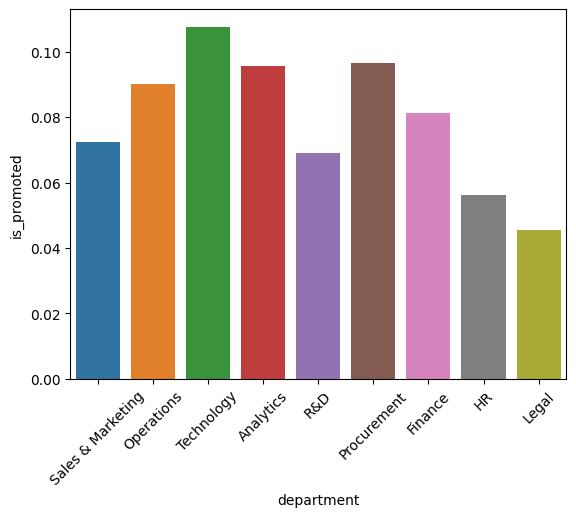

In [62]:
sns.barplot(x='department', y= 'is_promoted', data= df, errorbar= None)
plt.xticks(rotation=45)
plt.show()

Os departamentos já parecem exercem alguma diferença, já que dependendo da área a porcentagem de recomendações varia entre por volta de 11% no departamento de tecnologia e quase 4% na área legal.

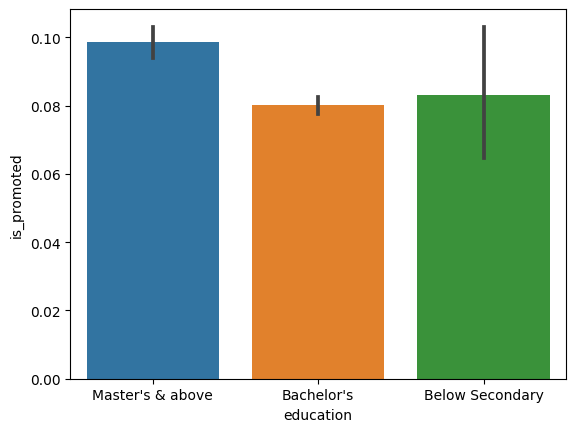

In [63]:
sns.barplot(x='education', y= 'is_promoted', data= df)
plt.show()

In [64]:
len(df[df['education']=='Below Secondary'])

805

Surpreendentemente o nível educacional não é uma feature essencial para a recomendação de promoção. Como esperado mestrado ou acima, tem uma porcentagem maior, porém nada muito significante, chega no máximo a 2% de diferença. Abaixo do ensino méido, apesar de estar em baixissima quantidade no dataset, apresenta uma porcentagem maior que bacharelado, ainda que uma diferença pequena.

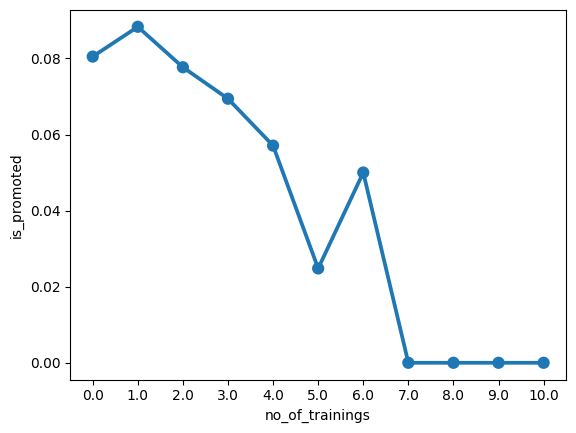

In [65]:
sns.pointplot(x='no_of_trainings', y= 'is_promoted', data= df, errorbar=None)
plt.show()

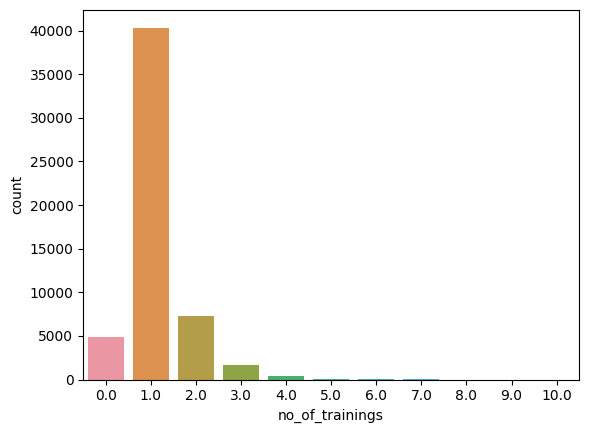

In [66]:
sns.countplot(x='no_of_trainings', data= df)
plt.show()

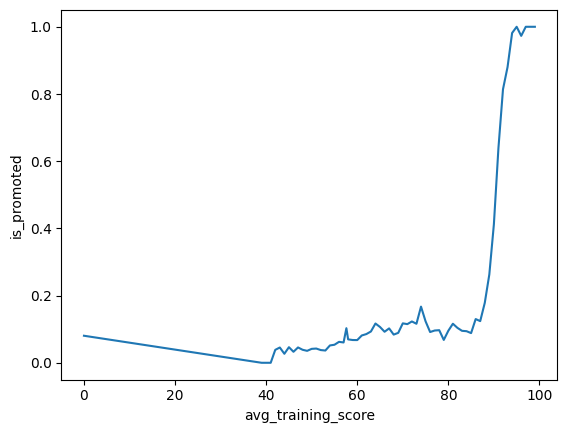

In [67]:
sns.lineplot(x='avg_training_score', y= 'is_promoted', data= df, errorbar= None)
plt.show()

In [68]:
len(df[(df['avg_training_score'] >= 90) & (df['avg_training_score'] <= 99)])

660

O número de treinos em si não é um fator diretamente proporcional ao aumento na possibilidade na recomendação de promoção, pelo gráfico até mesmo prejudicando a porcentagem, provavelmente por mais treinos fazer com que a média de pontuação diminua, feature essa que aí sim tem uma grande influência, os 660 funcionários com média maior que 90, tem, olhando o gráfico, uma porcentagem de pelo menos 80% de recomendação de promoção.
Lembrando que esses treino não são completamente decisivos, diversas pessoas que não o realizaram receberam recomendação, mantendo a média comum do dataset.

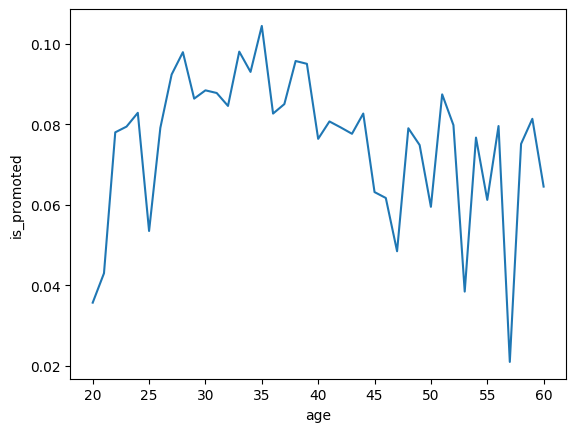

In [69]:
sns.lineplot(x='age', y= 'is_promoted', data= df, errorbar=None)
plt.show()

 A idade não tem um padrão direta ou inversamente proporcional na recomendação para a feature is_promoted, porém é possível perceber uma preferência para pessoas entre 30 e 40 anos, e um baixa nas idades mais avançadas.

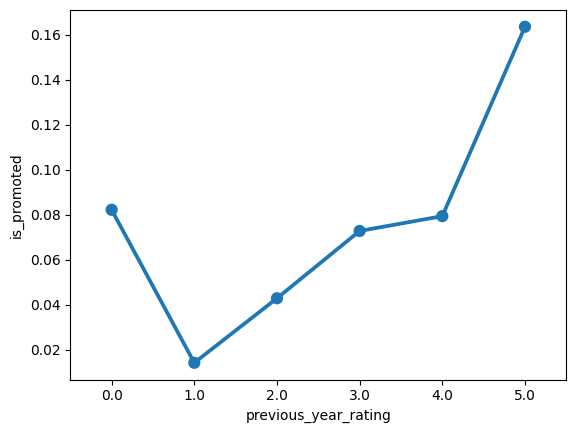

In [70]:
sns.pointplot(x='previous_year_rating', y= 'is_promoted', data= df, errorbar=None)
plt.show()

Excluindo os que entraram na empresa no ano atual, não tendo esse rating atribuido, que seguem a porcentagem geral de por voltade de 8,5%. Já nos ratings atribuidos, é possível ver que o rating do ano anterior tem uma grande diferença. Agindo de forma diretamentamente proporcional, raings 1 fazem a recomendação de promoção baixar para 2%, com 3 e 4 de rating a porcentagem chega ao normal geral, já com a nota máxima a recomendação sobe para basicamente o dobro da média geral, chegando a mais de 16%

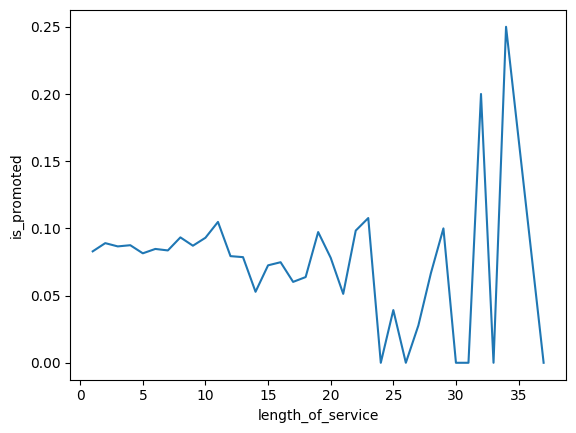

In [71]:
sns.lineplot(x='length_of_service', y= 'is_promoted', data= df, errorbar=None)
plt.show()

In [72]:
len(df[df['length_of_service'] > 20])

518

Os anos de serviço não parecem afetar muito no target, só fica nítido uma pequena queda a partir de mais ou menos 12 anos de serviço até os 20. Acima de 20, pela pequena quantidade de pessoas, não há um padrão na porcentagem.

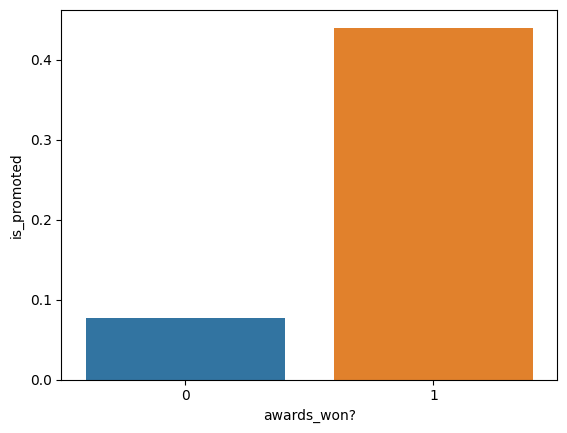

In [73]:
sns.barplot(x='awards_won?', y= 'is_promoted', data= df, errorbar= None)
plt.show()

Sem prémios a chance dos funcionários é a mesma do dataset geral, porém com o prémio a probabilidade sobe de 8% para 40%, feature que gera maior diferença no dataset.

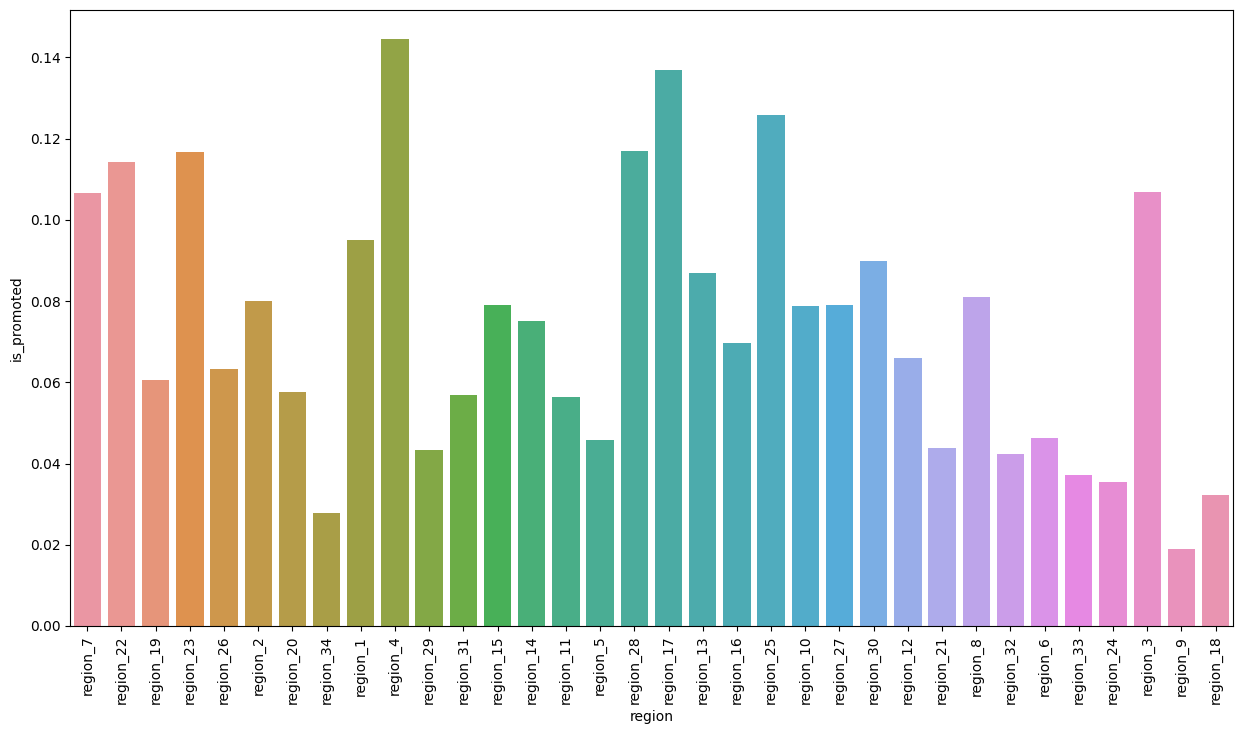

In [74]:
plt.figure(figsize=(15,8))
sns.barplot(x='region', y= 'is_promoted', data= df, errorbar= None)
plt.xticks(rotation=90)
plt.show()

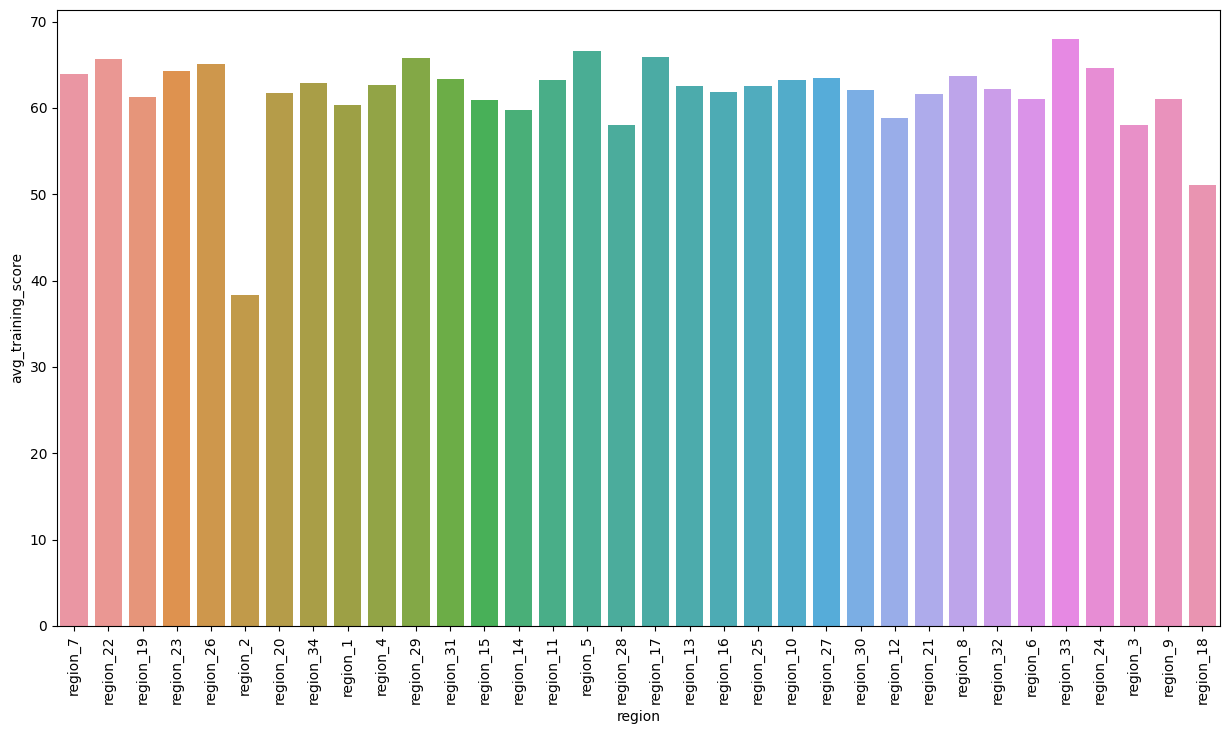

In [75]:
plt.figure(figsize=(15,8))
sns.barplot(x='region', y= 'avg_training_score', data= df, errorbar= None)
plt.xticks(rotation=90)
plt.show()

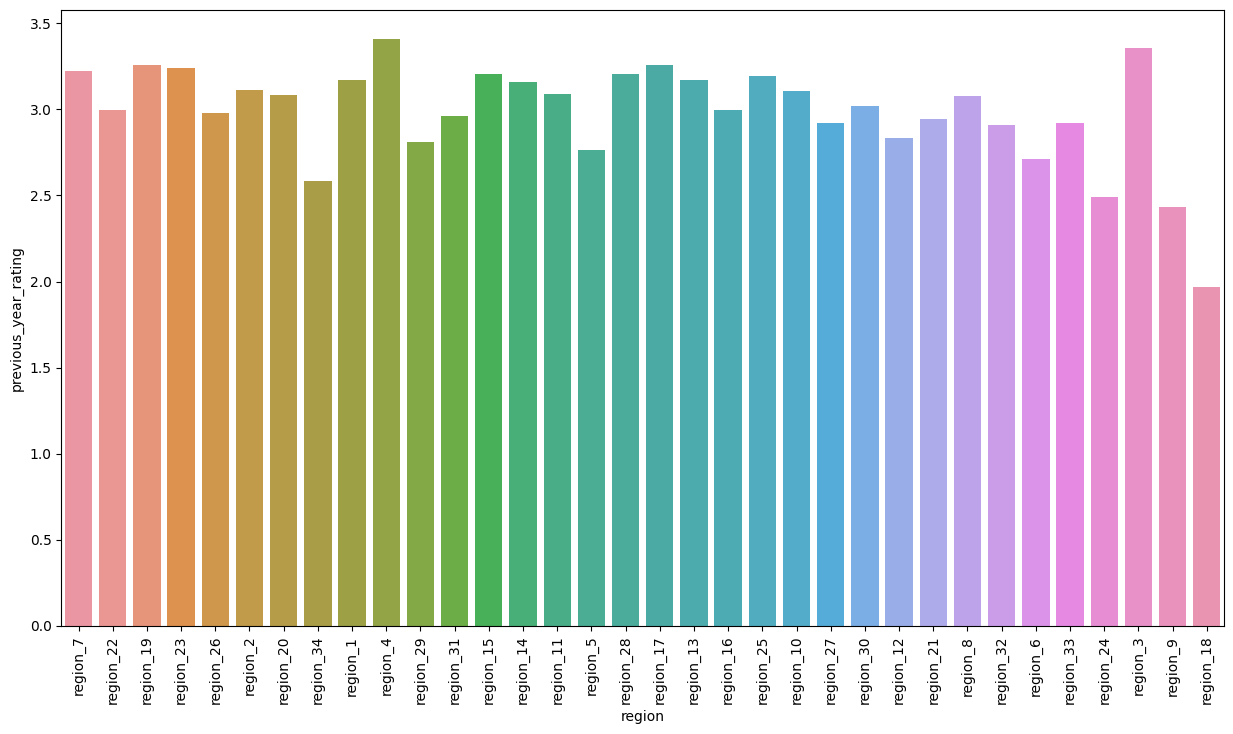

In [76]:
plt.figure(figsize=(15,8))
sns.barplot(x='region', y= 'previous_year_rating', data= df, errorbar= None)
plt.xticks(rotation=90)
plt.show()

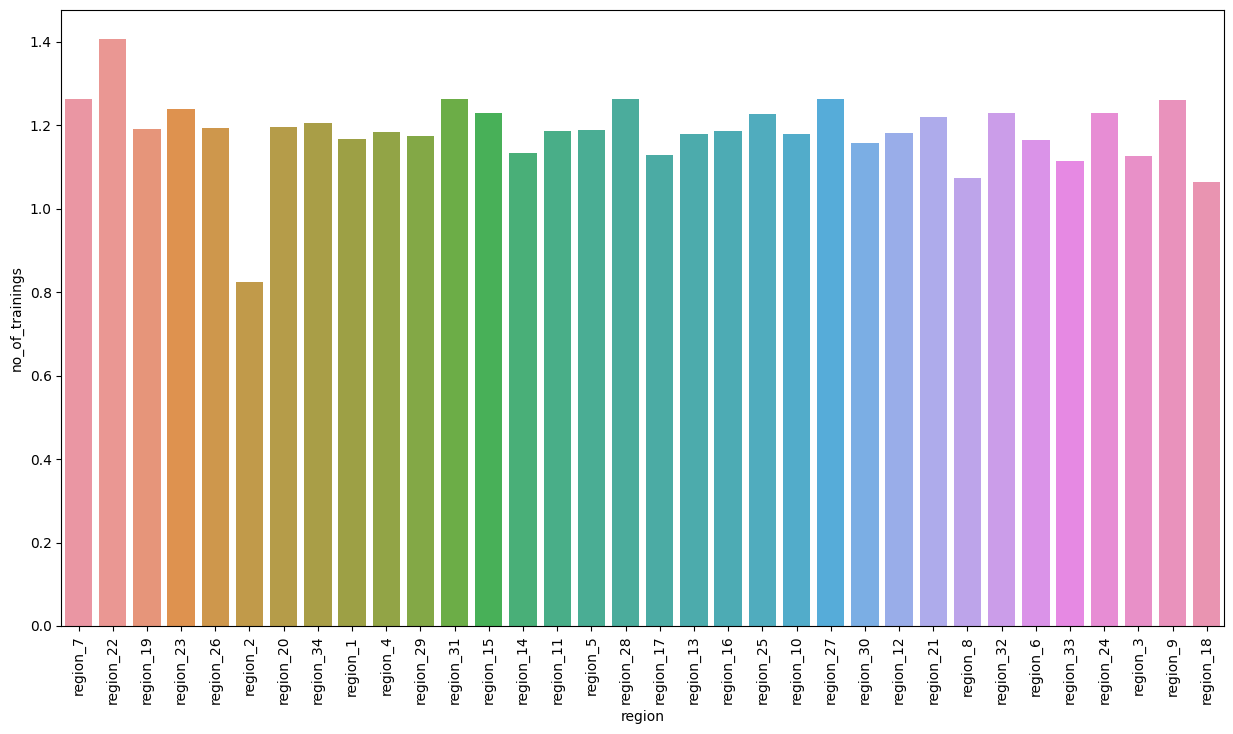

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(x='region', y= 'no_of_trainings', data= df, errorbar= None)
plt.xticks(rotation=90)
plt.show()

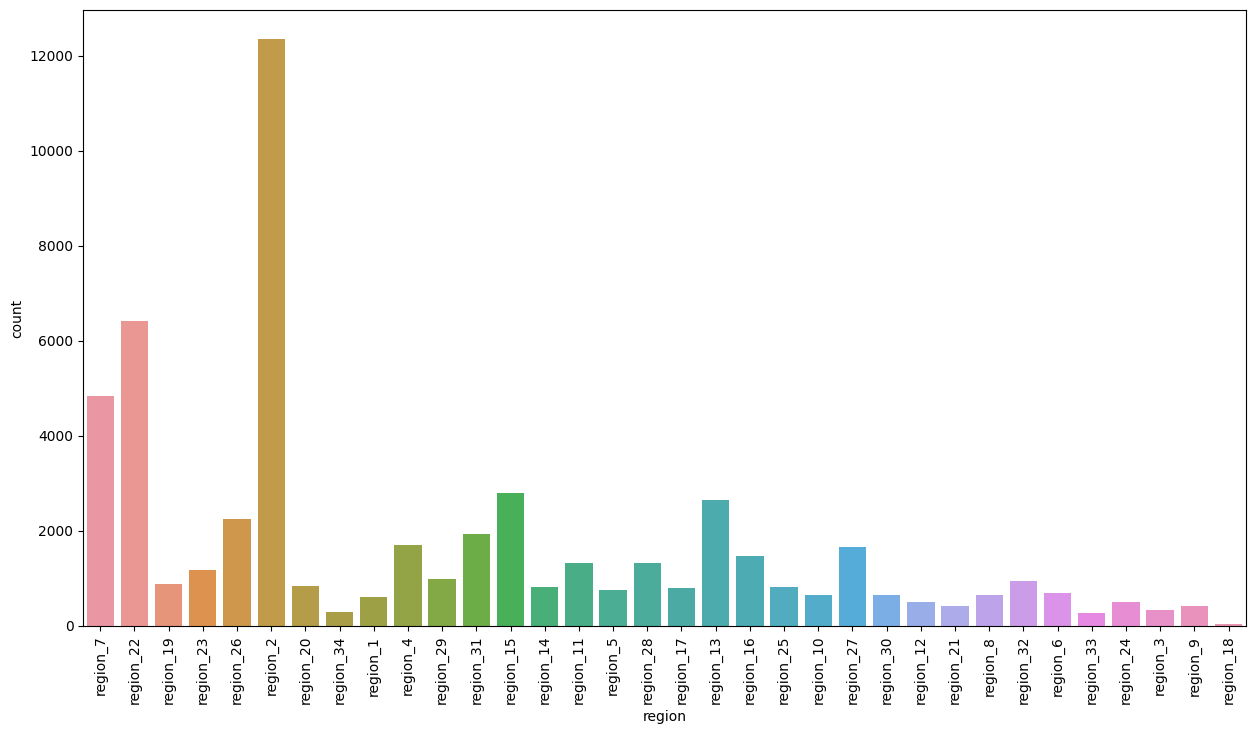

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(x='region', data=df)
plt.xticks(rotation=90)
plt.show()

A região parece fazer diferença na recomendação de promoção pelo primeiro gráfico, apesar da quantidade muito variada de pessoas por região, como nas métircas anteriores que mais influenciam o as médias por região são parecidas, provavelmente a região do emprego deve influenciar na promoção.  

Pelo objetivo passado de encontrar quais as features mais se relacionam ao target, finaliza-se a análise aqui.
Chegamos a conclução que calramente o rating do ano anterior, a nota média dos treinamentos, o departamento onde trabalha, a região do emprego e, por último e mais importante, o recebimento do prémio, são as features que mais influenciam na recomendação de promoção para um funcionário.

#Ex C:

Começando então o pré-processamento dos dados antes de colocá-los no modelo.

In [80]:
#categorical encolding
df_process=  pd.get_dummies(df, columns=['department', 'region', 'gender','recruitment_channel'])
df_process.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,Master's & above,1.0,35,5.0,8,0,49.0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
65141,Bachelor's,1.0,30,5.0,4,0,60.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7513,Bachelor's,1.0,34,3.0,7,0,50.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2542,Bachelor's,2.0,39,1.0,10,0,50.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
48945,Bachelor's,1.0,45,3.0,2,0,73.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [81]:
from sklearn.preprocessing import OrdinalEncoder

In [82]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(df_process[['education']])
df_process['education_encoded'] = ordinal_encoder.transform(df_process[['education']])
df_process.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,Master's & above,1.0,35,5.0,8,0,49.0,0,0,0,...,0,1,0,0,1,0,0,0,1,2.0
65141,Bachelor's,1.0,30,5.0,4,0,60.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0.0
7513,Bachelor's,1.0,34,3.0,7,0,50.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.0
2542,Bachelor's,2.0,39,1.0,10,0,50.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0.0
48945,Bachelor's,1.0,45,3.0,2,0,73.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0.0


Aparentemente a feature education não está ordenada da forma correta.

In [83]:
df_process.drop('education_encoded',axis=1, inplace=True)

In [84]:
categorias_educação = ["Below Secondary", "Bachelor's", "Master's & above"]
df_process['education'] = df_process['education'].astype('category')
df_process['education'] = df_process['education'].cat.reorder_categories(categorias_educação, ordered=True)

In [85]:
ordinal_encoder = OrdinalEncoder(categories=[categorias_educação])
ordinal_encoder.fit(df_process[['education']])
df_process['education_encoded'] = ordinal_encoder.transform(df_process[['education']])
df_process.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,Master's & above,1.0,35,5.0,8,0,49.0,0,0,0,...,0,1,0,0,1,0,0,0,1,2.0
65141,Bachelor's,1.0,30,5.0,4,0,60.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0
7513,Bachelor's,1.0,34,3.0,7,0,50.0,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
2542,Bachelor's,2.0,39,1.0,10,0,50.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0
48945,Bachelor's,1.0,45,3.0,2,0,73.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0


In [86]:
df_process.drop('education',axis=1, inplace=True)

#Ex D:

In [87]:
#normalização
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [88]:
colunas_a_normalizar=['no_of_trainings',	'age',	'previous_year_rating',	'length_of_service','avg_training_score']
df_norm=df_process[colunas_a_normalizar]
scaler.fit(df_norm)
df_process[colunas_a_normalizar]=scaler.transform(df_norm)
df_process.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,0.1,0.375,1.0,0.194444,0,0.494949,0,0,0,0,...,0,1,0,0,1,0,0,0,1,2.0
65141,0.1,0.250,1.0,0.083333,0,0.606061,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0
7513,0.1,0.350,0.6,0.166667,0,0.505051,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
2542,0.2,0.475,0.2,0.250000,0,0.505051,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0
48945,0.1,0.625,0.6,0.027778,0,0.737374,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1.0


#Ex E:


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [90]:
X=df_process.drop('is_promoted', axis=1).values
y=df_process['is_promoted'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12)
lista_acc=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  acc= accuracy_score(y_test, pred)
  lista_acc.append(acc)
print(lista_acc)

[0.8748403575989783, 0.913154533844189, 0.9068600620324758, 0.9158000364896917, 0.9150702426564495, 0.9149790184272943, 0.9150702426564495, 0.9153439153439153, 0.9153439153439153, 0.9155263638022259, 0.9153439153439153, 0.9150702426564495, 0.91525269111476, 0.9150702426564495, 0.91525269111476, 0.9150702426564495, 0.9150702426564495, 0.9149790184272943, 0.9147965699689837, 0.9147965699689837]


In [91]:
df_acc=pd.DataFrame(lista_acc, columns=['acuracia'])
K=[]
for i in range(1, len(df_acc) + 1):
  K.append(i)
df_acc["K"]=K
df_acc=df_acc.reindex(columns=['K',"acuracia"])
df_acc.head(20)

,K,acuracia
0,1,0.874840
1,2,0.913155
2,3,0.906860
3,4,0.915800
4,5,0.915070
5,6,0.914979
6,7,0.915070
7,8,0.915344
8,9,0.915344
9,10,0.915526


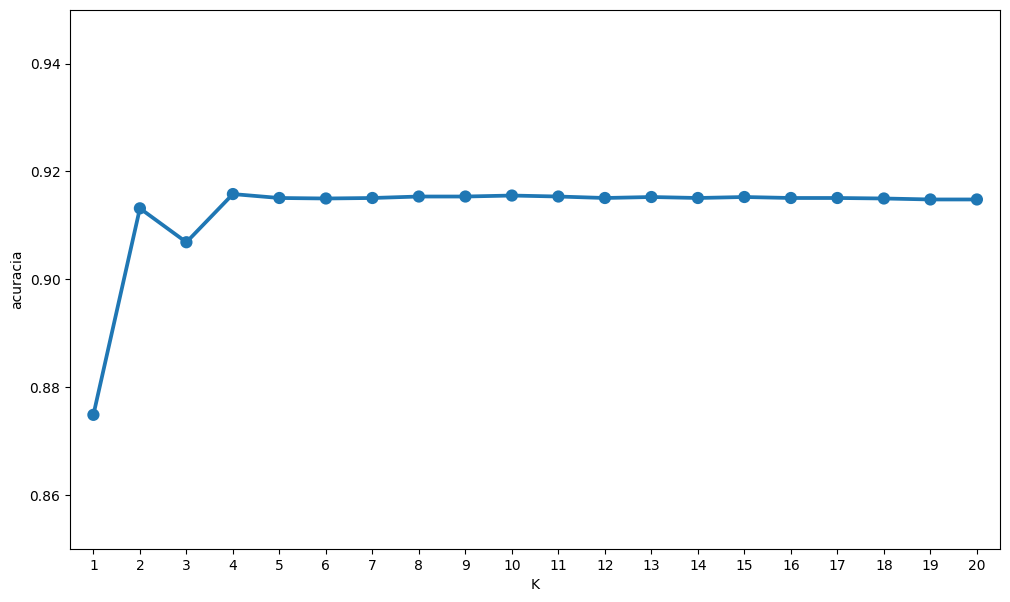

In [92]:
plt.figure(figsize=(12,7))
sns.pointplot(x='K',y='acuracia', data=df_acc)
plt.ylim(0.85, 0.95)
plt.show()

A diferença é bem mínima, porém o menor N com maior valor é N=4, com acurácia de 91,58%

#Ex F:


O modelo está com uma acuracia estranhamente alta, apesar de parecer algo positivo, pode ser que o modelo esteja overfitado, ou pior, como o target tem uma taxa de positivo de apenas 8,5%, ele pode apesar estar prevendo basicamente tudo como negativo

Dados desbalanceados são datasets com pequena incidência de uma categoria em comparação com as demais categorias, algo que pode em muitos casos interferir negativamente na criação de modelos. Um exemplo seriam dados relacionados ao diagnóstico de uma doença rara, que pela sua natureza incomum aparece como positiva (categoria de pequena incidência) poucas vezes.

E no caso do dataset deste execício pode ser o que está acontecendo.

#Ex G:

In [93]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [94]:
lista_recall=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  rec= recall_score(y_test, pred)
  lista_recall.append(rec)
print(lista_recall)

[0.17784877529286475, 0.058572949946751864, 0.0979765708200213, 0.039403620873269436, 0.058572949946751864, 0.019169329073482427, 0.02875399361022364, 0.01597444089456869, 0.022364217252396165, 0.01597444089456869, 0.02023429179978701, 0.010649627263045794, 0.01597444089456869, 0.009584664536741214, 0.012779552715654952, 0.009584664536741214, 0.010649627263045794, 0.007454739084132056, 0.008519701810436636, 0.007454739084132056]


In [95]:
lista_precision=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  prec= precision_score(y_test, pred)
  lista_precision.append(prec)
print(lista_precision)

[0.21773142112125163, 0.44715447154471544, 0.3458646616541353, 0.6379310344827587, 0.5392156862745098, 0.6206896551724138, 0.5869565217391305, 0.7894736842105263, 0.6774193548387096, 0.8823529411764706, 0.7037037037037037, 0.8333333333333334, 0.75, 0.9, 0.8571428571428571, 0.9, 0.8333333333333334, 1.0, 0.7272727272727273, 0.7777777777777778]


O recall ajuda a localizar os falsos negativos, já a precision o falso positivo, como foi previsto anteriormente, e agora confirmado pelos valores, o modelo basicamente está prevendo tudo como negativo, a percentagem de recall está baixíssima enquanto a da precision é bem alta, chegando, quando K=18, a uma precision de 100% e um recall menor que 1%, nenhum falso positivo e diversos falsos negativos.

In [96]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[10023     0]
 [  932     7]]


Literalmente apenas 7 previsões dadas como positivas ao todo, todas corretas, porém apenas 7, comparado a quase 11000 negativas, das quais 932 são falsamente negativas

#Ex H:

Através de um oversampling vou tentar rebalancear os dados para o modelo conseguir prever melhor.

In [97]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [98]:
smote = SMOTE(random_state = 42)
X_smote_res, y_smote_res = smote.fit_resample(X, y)

Agora repetir os processos:

In [99]:
X_train, X_test, y_train, y_test= train_test_split(X_smote_res, y_smote_res, test_size=0.2, random_state=12)
lista_acc=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  acc= accuracy_score(y_test, pred)
  lista_acc.append(acc)
print(lista_acc)

[0.9127941763063422, 0.8947945751894695, 0.8849720781810929, 0.8765456721180694, 0.862335460710012, 0.8569505384922218, 0.8458815317112086, 0.8422417231751097, 0.8284303948942959, 0.8233446350219386, 0.8110789788591942, 0.8092341443956921, 0.7989130434782609, 0.7962704427602713, 0.7898883127243718, 0.7875947347427203, 0.7808635819704827, 0.7799162345432789, 0.7726864778619864, 0.7728859194256082]


In [100]:
lista_recall=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  rec= recall_score(y_test, pred)
  lista_recall.append(rec)
print(lista_recall)

[0.9492117341847934, 0.8818599082019557, 0.9459189782478548, 0.8980243464378368, 0.9322490520854121, 0.8914388345639593, 0.922769906206346, 0.8868489323488326, 0.9123927359808421, 0.8740770305328278, 0.8964278587108362, 0.8642985432049491, 0.8856515665535821, 0.8552185192576333, 0.8752743963280782, 0.8474356415885053, 0.8678906405907004, 0.842945519856316, 0.8620035920973858, 0.840151666334065]


In [101]:
lista_precision=[]
for k in range(1, 21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  prec= precision_score(y_test, pred)
  lista_precision.append(prec)
print(lista_precision)

[0.8846833441830186, 0.9051618189266694, 0.8430413517118719, 0.8609144824947389, 0.8177680525164114, 0.8337844143723752, 0.7996541288370083, 0.8140685107162484, 0.7810711540104212, 0.793406394348338, 0.7655730720068172, 0.7783968368080517, 0.7545694125648219, 0.7648581117258612, 0.7474437627811861, 0.7566821097647898, 0.7390602430113009, 0.7484053862508859, 0.7311891663140077, 0.7403499516398487]


In [102]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[7952 2082]
 [ 679 9343]]


Após o grande aumento na quantidade de dados com o oversampler smote podemos ver uma melhora enorme no recall, e ainda a acuracia, quando o k não é muito alto, se mantém alta, assim como a precisão, porém dessa vez não há uma porcentagem "artificalmente" alta, não há mais um modelo que apenas prevê resultados negativos, a dessa vez há até mais previsões de resultados positivos.